In [ ]:
NAME = "Yvonne Zhou"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

similarity_pair1 = model.similarity("France", "England")
similarity_pair2 = model.similarity("smaller", "bigger")
similarity_pair3 = model.similarity("England", "London")
similarity_pair4 = model.similarity("France", "Rocket")
similarity_pair5 = model.similarity("big", "bigger")



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [ ]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model.most_similar(positive = ["France"])[:5]
vector_2 = model.most_similar(positive = ["England"])[:5]
vector_3 = model.most_similar(positive = ["smaller"])[:5]
vector_4 = model.most_similar(positive = ["bigger"])[:5]
vector_5 = model.most_similar(positive = ["rocket"])[:5]
vector_6 = model.most_similar(positive = ["big"])[:5]



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[('French', 0.7000749707221985), ('extradites_Noriega', 0.6946742534637451), ('Belgium', 0.6933180689811707), ('Villebon_Sur_Yvette', 0.6776412725448608), ('PARIS_AFX_Gaz_de', 0.6628001928329468)]
[('stock_symbol_BNK', 0.7334469556808472), ('ticker_symbol_BNK', 0.7256011962890625), ('Engand', 0.6351369619369507), ('Wales', 0.6337509155273438), ('Engalnd', 0.6287516355514526)]
[('larger', 0.8521074652671814), ('bigger', 0.7302271723747253), ('Smaller', 0.7003331184387207), ('Larger', 0.6532962322235107), ('similarly_sized', 0.6253994703292847)]
[('larger', 0.797631025314331), ('smaller', 0.7302272319793701), ('big', 0.6842385530471802), ('Bigger', 0.6754683256149292), ('grander', 0.5635557770729065)]
[('rockets', 0.8199313879013062), ('missile', 0.6771038770675659), ('Qassam_rocket', 0.6176819801330566), ('Katyusha_rocket', 0.614285945892334), ('Kassam_rocket', 0.600078821182251)]
[('huge', 0.7809855937957764), ('bigger', 0.6842385530471802), ('biggest', 0.6336528658866882), ('major', 0

### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [ ]:
#Replace 0 with the code / value; Do not delete this cell
def eu_distance(vec1, vec2):
  val_1 = [x[1] for x in vec1]
  val_2 = [x[1] for x in vec2]
  return np.sqrt(sum((np.array(val_1) - np.array(val_2)) ** 2))

eu_dist1 = eu_distance(model.most_similar(positive = ["France"]), model.most_similar(positive = ["England"]))
eu_dist2 = eu_distance(model.most_similar(positive = ["smaller"]), model.most_similar(positive = ["bigger"]))
eu_dist3 = eu_distance(model.most_similar(positive = ["England"]), model.most_similar(positive = ["London"]))
eu_dist4 = eu_distance(model.most_similar(positive = ["France"]), model.most_similar(positive = ["Rocket"]))
eu_dist5 = eu_distance(model.most_similar(positive = ["big"]), model.most_similar(positive = ["bigger"]))



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


0.12828817998325734
0.11647111404575597
0.0973762136865938
0.6504391948027279
0.10105091666495802


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive = ["King", "Queen"], negative = ["Man"])[:2]
closest2 = model.most_similar(positive = ["bigger", "small"], negative = ["big"])[:2]
closest3 = model.most_similar(positive = ["Man", "programmer"], negative = ["woman"])[:2]
closest4 = model.most_similar(positive = ["waiting", "run"], negative = ["wait"])[:2]
closest5 = model.most_similar(positive = ["Texas", "Milwaukee"], negative = ["Wisconsin"])[:2]






/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('Programmer', 0.488858163356781), ('Lead_Programmer', 0.43627363443374634)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
from random import sample

sampled = sample(list(model.wv.vocab), 20000)

sample_with_vector = {}
for s in sampled:
  sample_with_vector[s] = model.word_vec(s)

model_k = KMeans(n_clusters = 50, random_state = 42)
model_k = model_k.fit(list(sample_with_vector.values()))

word_with_lable = pd.DataFrame(data = {"words": sample_with_vector.keys(), "cluster_id": model_k.labels_})
word_with_lable.groupby("cluster_id")["words"].apply(np.array).head()

# From the output, we can see that there are some relationships between the words that are clustered into the same group, like the group that contains
# words like McVities, Pateley, Royal_Horticultural_Halls and etc. From Google, I see that McVities is a British snack food brand. Pateley is a bridge
# that is in North Yorkshire, England. And Royal Horticultural Halls is an event venue in London, England. The code did successfully capture that 
# these three words are somehow related as they are all from UK.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


cluster_id
0    [Zabrocki_Plaza, Lee_Chong_hwi, Consequently, ...
1    [Sheets_MFLI_announced, Dan_Campsall, Securita...
2    [fly_tyers, shallow_bays, greeting_card, midse...
3    [McVities, Pateley, Royal_Horticultural_Halls,...
4    [kbb.com, SULEV, Kenworths, GMC_pickup, Plymou...
Name: words, dtype: object

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
# Cross Entropy function is the loss function that the skipgram model is using. Cross Entropy function is a loss function that minimizes the negative
# log likelihood of the training set, which measures of our model's predict ability.

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
print(model.most_similar(positive = ["college", "earnings"], negative = ["men"])[:2])
print(model.most_similar(positive = ["family", "woman"], negative = ["men"])[:2])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Earnings', 0.46749138832092285), ('Bridgepoint_Education_Inc', 0.43606287240982056)]
[('mother', 0.6418260335922241), ('aunt', 0.5917495489120483)]


# Lab 6 (part 2)


In [ ]:
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize

#### Preprocessing data

In [ ]:
url = "https://dev.gutenberg.org/files/11/11-0.txt"
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

In [ ]:
firstlook[0:10]

['\ufeffThe Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions\r\nwhatsoever.',
 'You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.',
 "If you are not located in the United States, you'll have\r\nto check the laws of the country where you are located before using this ebook.",
 'Title: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: June 25, 2008 [EBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n\r\n\r\nProduced by Arthur DiBianca and David Widger\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Won

##### Regex

In [ ]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [ ]:
tokenized_raw[:10]

['The Project Gutenberg EBook of Alice s Adventures in Wonderland , by Lewis Carroll This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org .',
 "If you are not located in the United States , you'll have to check the laws of the country where you are located before using this ebook .",
 'Title : Alice s Adventures in Wonderland Author : Lewis Carroll Release Date : June 25 , 2008 [ EBook 11 ] [ Most recently updated : October 12 , 2020 ] Language : English Character set encoding : UTF-8 * * * START OF THIS PROJECT GUTENBERG EBOOK ALICE S ADVENTURES IN WONDERLAND * * * Produced by Arthur DiBianca and David Widger [ Illustration ] Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3 .',
 '0 Conten

##### Normalization

In [ ]:
# Remove punctuations
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

In [ ]:
# Word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:1]

[['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'Alice',
  's',
  'Adventures',
  'in',
  'Wonderland',
  'by',
  'Lewis',
  'Carroll',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'in',
  'the',
  'United',
  'States',
  'and',
  'most',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever']]

In [ ]:
### Creating a list of unique words 
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

3595

##### Training

In [ ]:
model = gensim.models.Word2Vec(tok_corp, min_count = 1, size = 15, window = 5)

In [ ]:
vector_list = model[unique_words]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
np.array(vector_list).shape

(3595, 15)

In [ ]:
for i in range(5):
    print(unique_words[i], vector_list[i])

_all_ [-0.06785063  0.01856182 -0.00272001 -0.00437701  0.01584373  0.03362476
  0.02775068 -0.02085341 -0.04670361  0.03768485 -0.04293537  0.03255289
  0.05203997 -0.0146002   0.03838179]
cheeks [-0.02820543  0.01885873  0.01094419  0.01186758  0.00928213  0.01500871
  0.01035967  0.01697095 -0.03253364  0.01232097 -0.03055898  0.005302
  0.01970799 -0.00098713 -0.01275722]
_yet_ [-0.00098518 -0.01441624 -0.01809305 -0.01107158 -0.02058658 -0.02187783
  0.01346856  0.02828576 -0.0315191   0.03513798  0.01571488  0.01401459
 -0.00928603  0.0175964  -0.00645857]
laws [-0.3759006   0.27996948 -0.23463906  0.09842293 -0.09138867  0.0314021
  0.02034728 -0.08994777 -0.1869196   0.4187927  -0.11177525  0.08918759
  0.42638183 -0.17883408  0.02809813]
heads [-0.2962223   0.18514025 -0.17869598  0.07362805 -0.05830074  0.04484998
 -0.02494403 -0.04310333 -0.1488859   0.3356943  -0.13042504  0.03189184
  0.3393822  -0.12272425  0.03153782]


In [ ]:
print(model.similarity("Rabbit", "watch"))
print(model.similarity("Queen", "head"))
print(model.similarity("Rabbit", "Hatter"))

0.9854669
0.9993681
0.99870265


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


From the similarity shown above, we can see that there are some relationships between some words. Based on the background knowledge, we know that in this book there is a rabbit always carrying a watch. The Queen of Hearts in the book has "Off with his/her head!" / "Off with their heads!" as her signature line. And the rabbit in the book also have a close relationship with the Mad Hatter. These kind of background knowledge are all shown in the similarity above. The words all have really high similarities.

### Dimension redcution using TSNE

In [ ]:
from sklearn.manifold import TSNE

data_embed = TSNE(n_components = 2, perplexity = 50, verbose = 2, method = "barnes_hut").fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3595 samples in 0.009s...
[t-SNE] Computed neighbors for 3595 samples in 0.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3595
[t-SNE] Computed conditional probabilities for sample 2000 / 3595
[t-SNE] Computed conditional probabilities for sample 3000 / 3595
[t-SNE] Computed conditional probabilities for sample 3595 / 3595
[t-SNE] Mean sigma: 0.032887
[t-SNE] Computed conditional probabilities in 0.462s
[t-SNE] Iteration 50: error = 76.5793762, gradient norm = 0.0485449 (50 iterations in 3.754s)
[t-SNE] Iteration 100: error = 71.4266891, gradient norm = 0.0122844 (50 iterations in 1.753s)
[t-SNE] Iteration 150: error = 71.0127792, gradient norm = 0.0111406 (50 iterations in 1.431s)
[t-SNE] Iteration 200: error = 70.7857208, gradient norm = 0.0060591 (50 iterations in 1.284s)
[t-SNE] Iteration 250: error = 70.6781158, gradient norm = 0.0086347 (50 iterations in 1.282s)
[t-SNE] KL divergence after 250 iterat

In [ ]:
from google.colab.output import eval_js
from IPython.display import Javascript

!git clone https://github.com/CAHLR/d3-scatterplot.git

def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'example.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


<IPython.core.display.Javascript object>

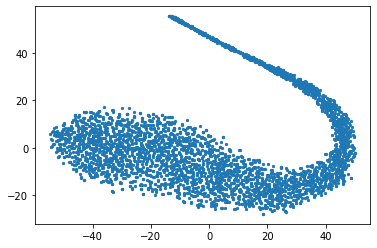